# `Web Scraping of Flipkart Laptop`

# `Extracting data from web`
- 1. **Web Scraping**: Extracting a particular website content
- 2. **Web Crawling**: Spider automatically extract the content of linked websites.

# `Web Scraping and Data Analysis`

### Web scraping is an automated task to extract large amounts of data from web pages

- **Steps involved**:

- Identify the URL from which you need the data.
- Inspect the HTML code behind the page.
- Find the elements you want to extract.
- Write the code the store the data in the required format.


- **Python libraries used**:

- requests: This is used to extract the HTML code from the given URL.
- BeautifulSoup: This is used to format and read the HTML content.
- re
- Numpy, Pandas, matplotlib, Seaborn etc..,
- ~~web crawling -> Scrapy~~

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

In [2]:
url='https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

## request

In [3]:
laptop_page=requests.get(url)
laptop_page.status_code

200

### 200 means success

In [4]:
page_content=laptop_page.text
page_content

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.fdabe1.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-

In [6]:
type(page_content)

str

In [5]:
soup=BeautifulSoup(page_content)

In [9]:
soup.find('div',attrs={'class':'_4rR01T'})

<div class="_4rR01T">acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA ...</div>

In [10]:
soup.find_all('div',attrs={'class':'_4rR01T'})

[<div class="_4rR01T">acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA ...</div>,
 <div class="_4rR01T">Avita Liber Core i5 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) NS14A8INF542-CS Thin and Light Laptop</div>,
 <div class="_4rR01T">HP 15s Dual Core 3020e - (4 GB/1 TB HDD/Windows 10 Home) 15s-GY0003AU Thin and Light Laptop</div>,
 <div class="_4rR01T">HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) 14s- DY2501TU Thin and Light Laptop</div>,
 <div class="_4rR01T">DELL Inspiron Core i3 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) Inspiron 3501 Laptop</div>,
 <div class="_4rR01T">HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windows 10 Home) 15s-GY0001AU Thin and Light Laptop</div>,
 <div class="_4rR01T">acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...</div>,
 <div class="_4rR01T">acer Aspire 3 Core i3 11th Gen - (4 GB/256 GB SSD/Windows 10 Home) A315-58 Thin and Light Lap

## Data Cleaning

In [11]:
clean_laptop_name=[]
for x in soup.find_all('div',attrs={'class':'_4rR01T'}):
    clean_laptop_name.append(x.text)

In [12]:
clean_laptop_name

['acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA ...',
 'Avita Liber Core i5 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) NS14A8INF542-CS Thin and Light Laptop',
 'HP 15s Dual Core 3020e - (4 GB/1 TB HDD/Windows 10 Home) 15s-GY0003AU Thin and Light Laptop',
 'HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Windows 10 Home) 14s- DY2501TU Thin and Light Laptop',
 'DELL Inspiron Core i3 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) Inspiron 3501 Laptop',
 'HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windows 10 Home) 15s-GY0001AU Thin and Light Laptop',
 'acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce ...',
 'acer Aspire 3 Core i3 11th Gen - (4 GB/256 GB SSD/Windows 10 Home) A315-58 Thin and Light Laptop',
 'MSI Modern 14 Core i3 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) Modern 14 B10MW-424IN Laptop',
 'Lenovo IdeaPad 3 Core i5 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) 15IIL05 Laptop',
 '

## This is just one page, now extract atleast 25 pages of Laptop

### url's of 25 pages

In [13]:
for i in range(25):
    url=f'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}'
    print(url)

https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=0
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6
https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7
https://www.flipkart.com/search?q=laptop

## Converting web scraping into web crawling( mimic webcrawling not a actual spider )
## Extracting a content from multiple pages

In [22]:
product_name=[]
page_number= []
for i in range(25):
    url=f'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}'
    response=requests.get(url)
    content=response.text
    soup=BeautifulSoup(content)
    
    for x in soup.find_all('div',attrs={'class':'_4rR01T'}):
        product_name.append(x.text)
        page_number.append(i)

In [25]:
data={'Product_Name':product_name,'Page_num':page_number}
data=pd.DataFrame(data)

In [26]:
data

,Product_Name,Page_num
0,HP 15s Dual Core 3020e - (4 GB/1 TB HDD/Window...,0
1,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,0
2,acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,0
3,acer Predator Helios 300 Core i7 10th Gen - (1...,0
4,DELL Inspiron Core i3 10th Gen - (8 GB/1 TB HD...,0
...,...,...
523,acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1...,24
524,HP Pavilion Gaming Ryzen 5 Hexa Core 4600H - (...,24
525,ASUS Ryzen 5 Hexa Core - (8 GB/1 TB HDD/256 GB...,24
526,DELL Inspiron Core i5 11th Gen - (8 GB/512 GB ...,24


## Now go to parent element, that will have all the content needed

In [29]:
product_name=[]
page_number= []
product_cost=[]
product_rating=[]
product_spec=[]
for i in range(25):
    start_time=time.time()
    url=f'https://www.flipkart.com/search?q=laptop&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}'
    response=requests.get(url)
    content=response.text
    soup=BeautifulSoup(content)
    
    for x in soup.find_all('div',attrs={'class':'_2kHMtA'}):
        pname=x.find('div',attrs={'class':'_4rR01T'})
        pcost=x.find('div',attrs={'class':'_30jeq3 _1_WHN1'})
        rating=x.find('div',attrs={'class':'_3LWZlK'})
        spec=x.find('ul',attrs={'class':'_1xgFaf'})
        
        if pname is None:
            product_name.append(np.NaN)
        else:
            product_name.append(pname.text)
            
        if pcost is None:
            product_cost.append(np.NaN)
        else:
            product_cost.append(pcost.text)
            
        if rating is None:
            product_rating.append(np.NaN)
        else:
            product_rating.append(rating.text)
            
        if spec is None:
            product_spec.append(np.NaN)
        else:
            product_spec.append(spec.text)
        page_number.append(i)
            
    end_time=time.time()      
    print('Scrapped Status = {} and Scrapped Time = {}'.format(response.status_code,end_time-start_time))
    time.sleep(1)

Scrapped Status = 200 and Scrapped Time = 1.0158543586730957
Scrapped Status = 200 and Scrapped Time = 0.9461424350738525
Scrapped Status = 200 and Scrapped Time = 1.0029127597808838
Scrapped Status = 200 and Scrapped Time = 0.9997246265411377
Scrapped Status = 200 and Scrapped Time = 0.9232141971588135
Scrapped Status = 200 and Scrapped Time = 0.9474141597747803
Scrapped Status = 200 and Scrapped Time = 0.9640753269195557
Scrapped Status = 200 and Scrapped Time = 0.9040513038635254
Scrapped Status = 200 and Scrapped Time = 1.0997095108032227
Scrapped Status = 200 and Scrapped Time = 1.010106086730957
Scrapped Status = 200 and Scrapped Time = 1.3794541358947754
Scrapped Status = 200 and Scrapped Time = 1.092625379562378
Scrapped Status = 200 and Scrapped Time = 1.1763455867767334
Scrapped Status = 200 and Scrapped Time = 1.109959602355957
Scrapped Status = 200 and Scrapped Time = 0.9391524791717529
Scrapped Status = 200 and Scrapped Time = 0.9381070137023926
Scrapped Status = 200 and S

In [30]:
print(len(product_name))
print(len(page_number))
print(len(product_cost))
print(len(product_rating))
print(len(product_spec))

600
600
600
600
600


In [31]:
data={'Product Name':product_name,
      'Product Cost':product_cost,
      'Product Rating':product_rating,
      'Product Specification':product_spec,
      'Page num':page_number
     }

In [34]:
data=pd.DataFrame(data)
data.to_csv('laptop.csv',index=False)

## use the extracted data but store it first in a csv file

In [36]:
laptop_data=pd.read_csv('C:\\Users\\manuj\\Innomatics Research labs\\My_Notebooks\\laptop.csv')
laptop_data.head()

,Product Name,Product Cost,Product Rating,Product Specification,Page num
0,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,"₹40,990",4.6,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,0
1,HP 15s Dual Core 3020e - (4 GB/1 TB HDD/Window...,"₹25,990",3.9,AMD Dual Core Processor4 GB DDR4 RAM64 bit Win...,0
2,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,"₹27,499",4.1,AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,0
3,acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1...,"₹64,990",4.4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,0
4,acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,"₹49,990",4.4,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,0


## Great, Now Cleaning of data

In [37]:
import re
regx=r'^\w+'
pregx=re.compile(regx)

laptop_data['Processor']=laptop_data['Product Specification'].apply(lambda x:pregx.search(x).group())

In [39]:
laptop_data.sample(5)

,Product Name,Product Cost,Product Rating,Product Specification,Page num,Processor
378,Avita Liber V14 Ryzen 5 Quad Core 3500U - (8 G...,"₹38,990",4.2,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,15,AMD
274,Lenovo Ideapad Gaming 3 Ryzen 7 Octa Core 4800...,"₹69,990",4.4,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,11,AMD
86,Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,"₹50,456",4.1,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,3,Intel
475,acer Core i7 8th Gen - (8 GB/1 TB HDD/Windows ...,"₹42,990",2.9,Intel Core i7 Processor (8th Gen)8 GB DDR4 RAM...,19,Intel
488,Lenovo Ideapad 3 Core i5 10th Gen - (8 GB/1 TB...,"₹49,988",4.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,20,Intel


In [44]:
import re
regx=r'[AMD|Intel][\s\w]+Processor'   # or [AMD|Intel][\sa-zA-Z0-9]+Processor
pregx=re.compile(regx)

laptop_data['Processor Model']=laptop_data['Product Specification'].apply(lambda x:pregx.search(x).group())

In [48]:
laptop_data.head()

,Product Name,Product Cost,Product Rating,Product Specification,Page num,Processor Company,Processor Model
0,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,"₹40,990",4.6,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,0,Intel,Intel Core i3 Processor
1,HP 15s Dual Core 3020e - (4 GB/1 TB HDD/Window...,"₹25,990",3.9,AMD Dual Core Processor4 GB DDR4 RAM64 bit Win...,0,AMD,AMD Dual Core Processor
2,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,"₹27,499",4.1,AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,0,AMD,AMD Athlon Dual Core Processor
3,acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1...,"₹64,990",4.4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,0,AMD,AMD Ryzen 5 Hexa Core Processor
4,acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,"₹49,990",4.4,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,0,AMD,AMD Ryzen 5 Quad Core Processor


In [49]:
laptop_data['Product Specification'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 10 Operating System256 GB SSD35.56 cm (14 inch) DisplayHP Documentation, HP SSRM, HP Smart, Microsoft Office 2019, McAfeeLiveSafe 30 day trial, HP Support Assistant1 Year Onsite Warranty'

In [51]:
import re
regx=r'[0-9][\sA-Za-z0-9]+RAM'
pregx=re.compile(regx)

laptop_data['Product RAM']=laptop_data['Product Specification'].apply(lambda x:pregx.search(x).group())

In [52]:
laptop_data.head()

,Product Name,Product Cost,Product Rating,Product Specification,Page num,Processor Company,Processor Model,Product RAM
0,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,"₹40,990",4.6,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,0,Intel,Intel Core i3 Processor,8 GB DDR4 RAM
1,HP 15s Dual Core 3020e - (4 GB/1 TB HDD/Window...,"₹25,990",3.9,AMD Dual Core Processor4 GB DDR4 RAM64 bit Win...,0,AMD,AMD Dual Core Processor,4 GB DDR4 RAM
2,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,"₹27,499",4.1,AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,0,AMD,AMD Athlon Dual Core Processor,4 GB DDR4 RAM
3,acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1...,"₹64,990",4.4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,0,AMD,AMD Ryzen 5 Hexa Core Processor,5 Hexa Core Processor8 GB DDR4 RAM
4,acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,"₹49,990",4.4,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,0,AMD,AMD Ryzen 5 Quad Core Processor,5 Quad Core Processor8 GB DDR4 RAM


In [56]:
import re
regx=r'[0-9\s]+(?:GB|TB)\s(?:HDD|SSD)'
pregx=re.compile(regx)

laptop_data['HardDisk']=laptop_data['Product Specification'].apply(lambda x:np.NaN if pregx.search(x) is None else pregx.search(x).group() )

In [57]:
laptop_data.head()

,Product Name,Product Cost,Product Rating,Product Specification,Page num,Processor Company,Processor Model,Product RAM,HardDisk
0,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,"₹40,990",4.6,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,0,Intel,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD
1,HP 15s Dual Core 3020e - (4 GB/1 TB HDD/Window...,"₹25,990",3.9,AMD Dual Core Processor4 GB DDR4 RAM64 bit Win...,0,AMD,AMD Dual Core Processor,4 GB DDR4 RAM,1 TB HDD
2,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,"₹27,499",4.1,AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,0,AMD,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,1 TB HDD
3,acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1...,"₹64,990",4.4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,0,AMD,AMD Ryzen 5 Hexa Core Processor,5 Hexa Core Processor8 GB DDR4 RAM,1 TB HDD
4,acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,"₹49,990",4.4,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,0,AMD,AMD Ryzen 5 Quad Core Processor,5 Quad Core Processor8 GB DDR4 RAM,512 GB SSD


## Hardisk column have some missing values

In [62]:
laptop_data['HardDisk'].isna().sum() # 7 rows in whole data

7

In [67]:
laptop_data[laptop_data['HardDisk'].isna()]['Product Specification'][18]

'Intel Celeron Dual Core Processor4 GB DDR4 RAM64 bit Windows 10 Operating System29.46 cm (11.6 inch) Touchscreen Display24 Months Warranty'

In [68]:
import re
regx=r'[a-zA-Z]+\s'
pregx=re.compile(regx)

laptop_data['Brand']=laptop_data['Product Name'].apply(lambda x:pregx.search(x).group())

In [71]:
laptop_data.sample(2)

,Product Name,Product Cost,Product Rating,Product Specification,Page num,Processor Company,Processor Model,Product RAM,HardDisk,Brand
545,ASUS Ryzen 7 Octa Core - (8 GB/512 GB SSD/Wind...,"₹74,990",NaN,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,22,AMD,AMD Ryzen 7 Octa Core Processor,7 Octa Core Processor8 GB DDR4 RAM,512 GB SSD,ASUS
390,ASUS Ryzen 5 Quad Core 3500U - (8 GB/1 TB HDD/...,"₹41,990",3.9,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,16,AMD,AMD Ryzen 5 Quad Core Processor,5 Quad Core Processor8 GB DDR4 RAM,1 TB HDD,ASUS


In [72]:
regx=r'\d+,\d+'
pregx=re.compile(regx)

laptop_data['Product Cost']=laptop_data['Product Cost'].apply(lambda x:pregx.search(x).group().replace(',',''))

In [75]:
laptop_data['Product Cost']

0      40990
1      25990
2      27499
3      64990
4      49990
       ...  
595    64990
596    39300
597    78900
598    75990
599      116
Name: Product Cost, Length: 600, dtype: object

## It's object so change it in float

In [76]:
laptop_data['Product Cost']=laptop_data['Product Cost'].astype(float)

In [77]:
laptop_data.head()

,Product Name,Product Cost,Product Rating,Product Specification,Page num,Processor Company,Processor Model,Product RAM,HardDisk,Brand
0,HP 14s Core i3 11th Gen - (8 GB/256 GB SSD/Win...,40990.0,4.6,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,0,Intel,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,HP
1,HP 15s Dual Core 3020e - (4 GB/1 TB HDD/Window...,25990.0,3.9,AMD Dual Core Processor4 GB DDR4 RAM64 bit Win...,0,AMD,AMD Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,HP
2,HP 15s Athlon Dual Core - (4 GB/1 TB HDD/Windo...,27499.0,4.1,AMD Athlon Dual Core Processor4 GB DDR4 RAM64 ...,0,AMD,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,HP
3,acer Nitro 5 Ryzen 5 Hexa Core 4600H - (8 GB/1...,64990.0,4.4,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,0,AMD,AMD Ryzen 5 Hexa Core Processor,5 Hexa Core Processor8 GB DDR4 RAM,1 TB HDD,acer
4,acer Aspire 7 Ryzen 5 Quad Core 3550H - (8 GB/...,49990.0,4.4,AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...,0,AMD,AMD Ryzen 5 Quad Core Processor,5 Quad Core Processor8 GB DDR4 RAM,512 GB SSD,acer


In [78]:
laptop_data.isnull().sum()

Product Name               0
Product Cost               0
Product Rating           157
Product Specification      0
Page num                   0
Processor Company          0
Processor Model            0
Product RAM                0
HardDisk                   7
Brand                      0
dtype: int64

## Data is good to go for further analysis

In [80]:
laptop_data.columns

Index(['Product Name', 'Product Cost', 'Product Rating',
       'Product Specification', 'Page num', 'Processor Company',
       'Processor Model', 'Product RAM', 'HardDisk', 'Brand'],
      dtype='object')

In [86]:
px.box(x=laptop_data['Product Cost'],color=laptop_data['Brand'])

In [87]:
px.box(x=laptop_data['Product Cost'],color=laptop_data['Processor Company'])

In [92]:
laptop_data.groupby('Brand').agg({'Product Cost':['min','max','mean','median']})

Product Cost                                
                    min      max          mean   median
Brand                                                  
ALIENWARE         174.0    243.0    198.000000    174.0
APPLE             109.0  98990.0  22735.625000    174.0
ASUS              104.0  99580.0  47202.153333  54994.5
Avita           17990.0  40890.0  33528.000000  38990.0
DELL              109.0  95825.0  52517.200000  57836.0
HP                102.0  96490.0  46679.839506  44490.0
LG              69990.0  72990.0  71490.000000  71490.0
Lenovo            117.0  99990.0  46154.244898  43990.0
MICROSOFT       38549.0  99990.0  85701.800000  99990.0
MSI               149.0  99990.0  65548.534884  74990.0
Mi              46999.0  59999.0  53999.000000  54999.0
Nexstgo         79990.0  79990.0  79990.000000  79990.0
Vaio            50990.0  59990.0  57740.000000  59990.0
acer              114.0  81998.0  35555.738462  38990.0
iBall           13990.0  13990.0  13990.000000  13990.0
lenovo          60990.0  97990.0  79490.000000  79490.0

In [96]:
laptop_data.groupby('Brand').agg({'Product Cost':'max'})

,Product Cost
Brand,
ALIENWARE,243.0
APPLE,98990.0
ASUS,99580.0
Avita,40890.0
DELL,95825.0
HP,96490.0
LG,72990.0
Lenovo,99990.0
MICROSOFT,99990.0


<AxesSubplot:xlabel='Brand'>

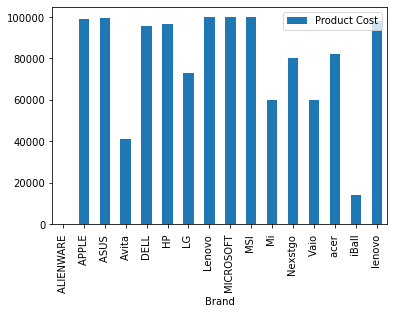

In [100]:
laptop_data.groupby('Brand').agg({'Product Cost':'max'}).plot.bar()

# `Completed`